**5. Unsharp masking and high boost filtering**

In [32]:
#importing required libraries
import cv2 
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [33]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


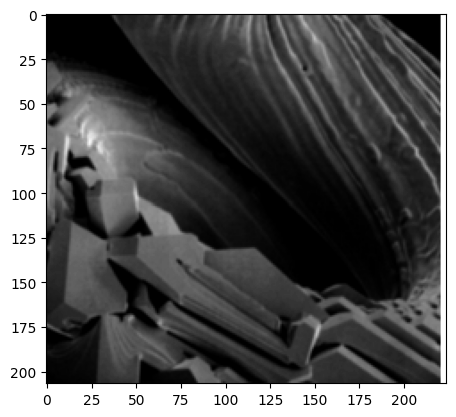

In [34]:
#reading the input image
input_img = cv2.imread('/content/drive/MyDrive/DIP/assignment 2/prob5.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(input_img, 'gray')

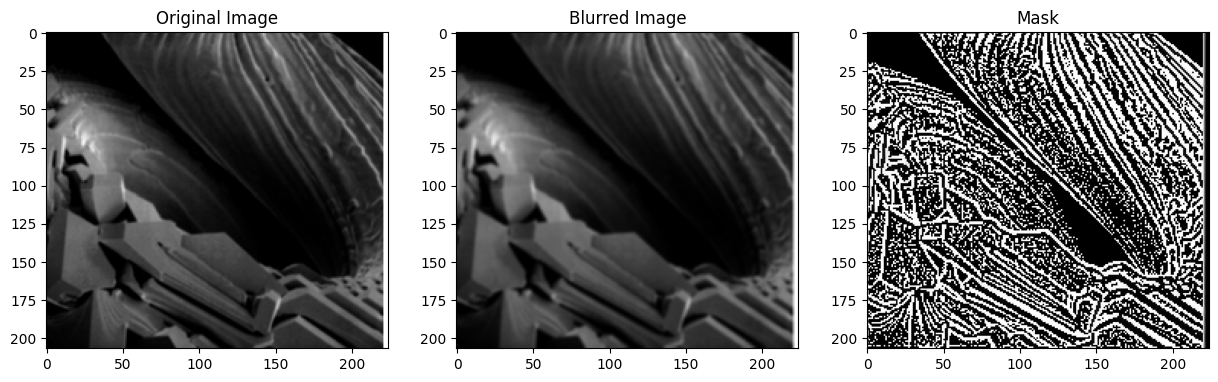

In [28]:
# Weighted averaging filter
kernel = np.array([[1,2,1], [2,4,2], [1,2,1]], np.float32) / 16

#Applying the average weighted filter to get the blurred image
blurred_img = cv2.filter2D(input_img, -1, kernel)

#creating mask by subtracting the blurred image from the original image
mask = input_img - blurred_img

#Displaying  the original input image, blurred image using weighted average filtering and the mask
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axis[0].imshow(input_img, cmap='gray')
axis[0].set_title('Original Image')
axis[1].imshow(blurred_img, cmap='gray')
axis[1].set_title('Blurred Image')
axis[2].imshow(mask, cmap='gray')
axis[2].set_title('Mask')
plt.show()

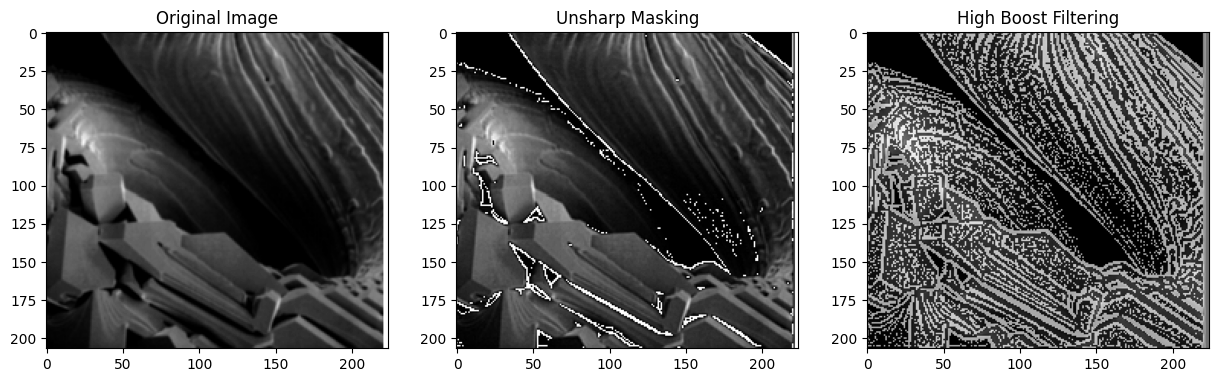

In [39]:
#Here, k=1 for unsharp image, we add the mask to the input image
unsharp_img = input_img + 1*mask  

#High boost filtering is when k>1
high_boost = input_img + 1.5*mask

#Displaying the original image and the filtered images
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axs[0].imshow(input_img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(unsharp_img, cmap='gray')
axs[1].set_title('Unsharp Masking')
axs[2].imshow(high_boost, cmap='gray')
axs[2].set_title('High Boost Filtering')
plt.show()


Unsharp filtering is used to enhance the edges and fine details in an image.  Unsharp filtering is done by subtracting a blurred version of the image from the original image, adding that mask to the original image, thereby enhancing the edges and fine details. Unsharp filtering enhances the edges and fine details in the image, making it sharper and detailed. It also amplifies the noise in the image, which reduces the overall quality of the image. 

High-boost filtering is when k is greater than 1. Like unsharp filtering, this also follows the same procedure, it enhances the edges and fine details. If the k value is too high, it can lead to over-enhancement of the image which results in more noise in the image.